In [7]:
from matplotlib.colors import LogNorm
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

In [8]:
# Load iris
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']], columns= iris_data['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
# delete kelas target - class target tidak terlalu penting untuk clustering
del iris_df["target"]

In [10]:
# look
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


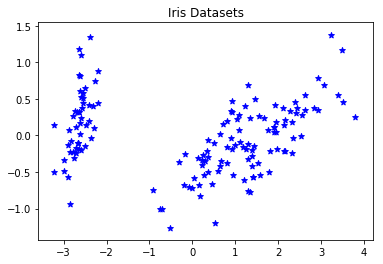

In [11]:
# praprosesing
# menampilkan data untuk eksplorasi
def plot_initial(df, title): 
    pca = PCA(n_components=2).fit(df)
    pca_2d = pca.transform(df)
    for i in range(0, pca_2d.shape[0]):
        c = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    pl.title(title)
    pl.show()

plot_initial(iris_df, "Iris Datasets")